In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

#boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


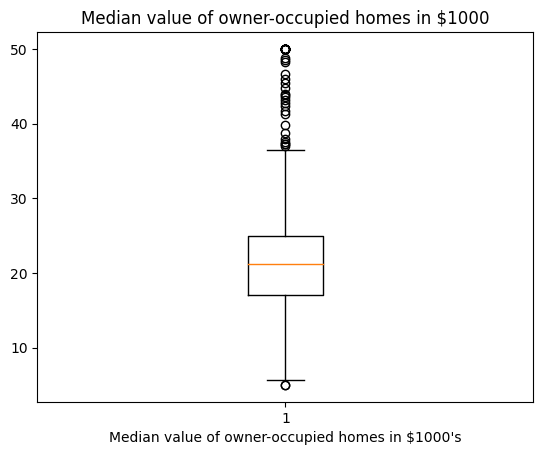

In [142]:
plot = plt.boxplot(boston_df['MEDV'])
plt.title('Median value of owner-occupied homes in $1000')
plt.xlabel("Median value of owner-occupied homes in $1000's")
plt.show()

The boxplot shows the median of median of house value is about $21,000. 
There are outliers with higher or lower house value.

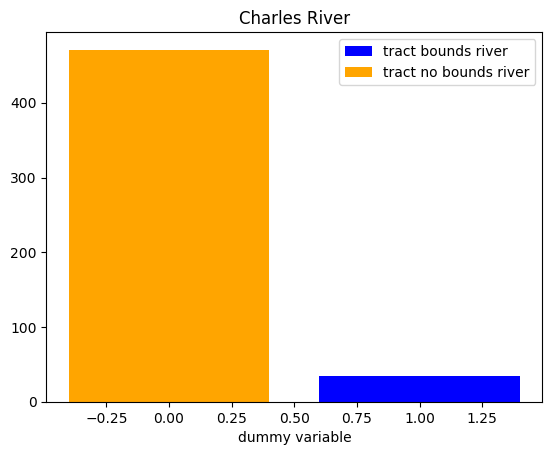

In [145]:
plot2 = plt.bar( boston_df[boston_df['CHAS'] == 1]['CHAS'], boston_df[boston_df['CHAS'] == 1]['CHAS'].count(), color = 'blue', label='tract bounds river')
plot3 = plt.bar( boston_df[boston_df['CHAS'] == 0]['CHAS'], boston_df[boston_df['CHAS'] == 0]['CHAS'].count(),  color = 'orange', label='tract no bounds river')
plt.title("Charles River")
plt.xlabel("dummy variable")
plt.legend()
plt.show()

The bar plot shows the larger proportion of houses are not near to the Charles River.

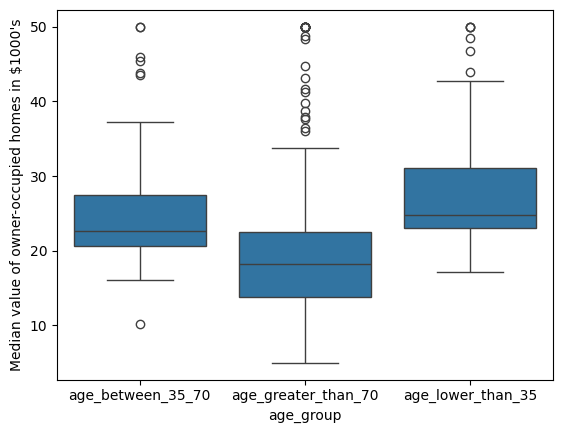

In [146]:
boston_df.loc[(boston_df['AGE']<=35), 'age_group'] = 'age_lower_than_35'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'age_group'] = 'age_between_35_70'
boston_df.loc[(boston_df['AGE']>=70), 'age_group' ] = 'age_greater_than_70'
sns.boxplot(x='age_group',y='MEDV',data=boston_df)
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()


The boxplot shows the age group of 35 yeas and younger tend to have the highest median of median house value, whereas the age group 70 years and older have the lowest median value

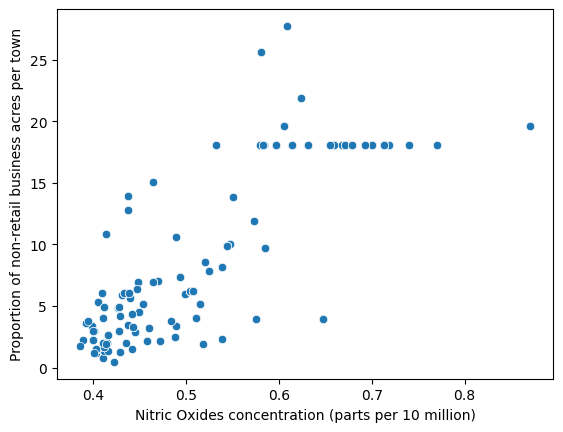

In [148]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.ylabel("Proportion of non-retail business acres per town")
plt.xlabel("Nitric Oxides concentration (parts per 10 million)")
plt.show()

The scatter plot shows positive correlation between NOX and INDUS. As the proportion of non-retail business increase, the notrox oxides concertration tend to increase.

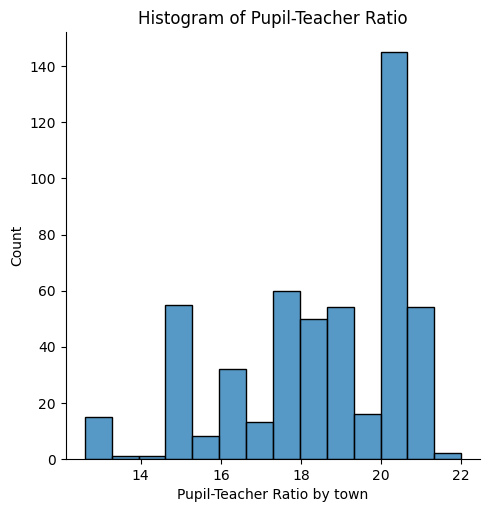

In [150]:
sns.displot(boston_df['PTRATIO'])
plt.title("Histogram of Pupil-Teacher Ratio")
plt.xlabel("Pupil-Teacher Ratio by town")
plt.show()

The histrogram shows that the most common pupil-teacher ratio is about 20.

In [151]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var=False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

H0: No difference in MEDV
H1: there is diff in MEDV
Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses based on the Charles river dummy variable

In [137]:
scipy.stats.levene(boston_df[boston_df['age_group'] == 'age_lower_than_35']['MEDV'],
                   boston_df[boston_df['age_group'] == 'age_greater_than_70']['MEDV'], 
                   boston_df[boston_df['age_group'] == 'age_between_35_70']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

H0: No difference in MEDV
H1: there is difference

Since the p-value is greater than alpha value 0.05, we dont reject the null hypothesis. No difference observed.

In [138]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209189, pvalue=7.913361061211254e-98)

H0: no correlation

pvalue<< 0.05 we reject the null hypothesis. There is some correlation.

In [140]:
import statsmodels.api as sm


In [141]:
X= boston_df['DIS']
Y= boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        14:22:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

H0 there is no effect

pvalue(e-08)<<0.05 reject the null hypothesis